## Libs

In [1]:
import matplotlib as matpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# Using the Tensorflow backend (default).
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from tensorflow import set_random_seed
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from keras.callbacks import EarlyStopping

# advanced plotting
import seaborn as sns
plt.style.use('seaborn-darkgrid')
%matplotlib inline

Using TensorFlow backend.


## Data

In [2]:
%store -r data_VNQ
data_VNQ.head(2)

,Adj Close
Date,
2009-06-01,22.627659
2009-06-08,22.154604


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a4593c0b8>],
      dtype=object)

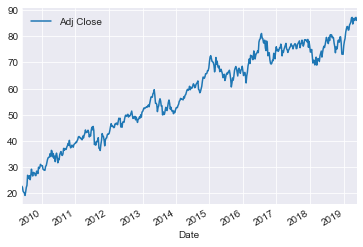

In [3]:
data_VNQ.plot(subplots=True)

In [4]:
mm = MinMaxScaler(feature_range = (0,1))

In [5]:
dataset = mm.fit_transform(data_VNQ)

In [6]:
#visualize a dataset[0:2]few data
dataset[0:2]

array([[0.05207578],
       [0.04513359]])

1 data every week. 52 data per year, 522 data in total.
* use the past 2 months (8 weeks) to predict 1 week ahead.
* create window of last 8 obs to train model
Parameters:
* history_size - size of past window
* target_size - how far in future model should learn to predict

6 years of training data = 313 weeks. 
Rest of the 209 weeks are for validation.

In [7]:
split = 0.6

train_size = int(len(dataset) * split)
#validation
test_size = len(dataset) - train_size

train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

print("training, test set: " + str((len(train), len(test))))

training, test set: (313, 209)


In [8]:
def input_dataset(dataset, window):
    data_X, data_y = [], []
    for i in range(len(dataset) - window - 1):
        a = dataset[i:(i + window), 0]
        data_X.append(a)
        data_y.append(dataset[i + window, 0])
    return(np.array(data_X), np.array(data_y))


In [9]:
# New testing and training sets for rolling forecast.
window = 1
train_X, train_Y = input_dataset(train, window)
test_X, test_Y = input_dataset(test, window)
print("Original train shape:")
print(train_X.shape)

# Reshape input data to match Keras format.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New train shape:")
print(train_X.shape)

Original train shape:
(311, 1)
New train shape:
(311, 1, 1)


## Univar Forecasting Model
* Part 1 - model will be given the last 4 obs and needs to learn to predict price in the next time step.

In [10]:
def fit_LSTM(train_X, train_Y, window = 1, neurons=128):
    set_random_seed(3)
    model = Sequential()
    
    model.add(LSTM(neurons, 
                   input_shape = (1, window)
                  ))
    model.add(Dense(1))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
    earlyStop=EarlyStopping(monitor="val_loss",verbose=2,patience=15)
    model.fit(train_X, 
              train_Y, 
              epochs = 2000, 
              batch_size = 25,
              shuffle = False
             # verbose = 2
             )
    
    return(model)

# Fit the first model.
model1 = fit_LSTM(train_X, train_Y, window)

W0917 00:25:57.253928 4639303104 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0917 00:25:57.255586 4639303104 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0917 00:25:57.257685 4639303104 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0917 00:25:57.490963 4639303104 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0917 00:25:57.642969 4639303104 deprecation.py:323] From //anaconda3/li

Epoch 1/4000
311/311 [==============================] - 2s 5ms/step - loss: 0.1928
Epoch 2/4000
311/311 [==============================] - 0s 42us/step - loss: 0.1871
Epoch 3/4000
311/311 [==============================] - 0s 31us/step - loss: 0.1815
Epoch 4/4000
311/311 [==============================] - 0s 31us/step - loss: 0.1760
Epoch 5/4000
311/311 [==============================] - 0s 31us/step - loss: 0.1706
Epoch 6/4000
311/311 [==============================] - 0s 30us/step - loss: 0.1653
Epoch 7/4000
311/311 [==============================] - 0s 30us/step - loss: 0.1601
Epoch 8/4000
311/311 [==============================] - 0s 31us/step - loss: 0.1549
Epoch 9/4000
311/311 [==============================] - 0s 30us/step - loss: 0.1499
Epoch 10/4000
311/311 [==============================] - 0s 32us/step - loss: 0.1450
Epoch 11/4000
311/311 [==============================] - 0s 31us/step - loss: 0.1401
Epoch 12/4000
311/311 [==============================] - 0s 32us/step - los

Epoch 98/4000
311/311 [==============================] - 0s 30us/step - loss: 0.0118
Epoch 99/4000
311/311 [==============================] - 0s 30us/step - loss: 0.0117
Epoch 100/4000
311/311 [==============================] - 0s 32us/step - loss: 0.0116
Epoch 101/4000
311/311 [==============================] - 0s 32us/step - loss: 0.0116
Epoch 102/4000
311/311 [==============================] - 0s 30us/step - loss: 0.0115
Epoch 103/4000
311/311 [==============================] - 0s 32us/step - loss: 0.0115
Epoch 104/4000
311/311 [==============================] - 0s 31us/step - loss: 0.0114
Epoch 105/4000
311/311 [==============================] - 0s 32us/step - loss: 0.0113
Epoch 106/4000
311/311 [==============================] - 0s 31us/step - loss: 0.0113
Epoch 107/4000
311/311 [==============================] - 0s 30us/step - loss: 0.0112
Epoch 108/4000
311/311 [==============================] - 0s 31us/step - loss: 0.0112
Epoch 109/4000
311/311 [==============================] 

Epoch 194/4000
311/311 [==============================] - 0s 34us/step - loss: 0.0062
Epoch 195/4000
311/311 [==============================] - 0s 32us/step - loss: 0.0062
Epoch 196/4000
311/311 [==============================] - 0s 33us/step - loss: 0.0061
Epoch 197/4000
311/311 [==============================] - 0s 32us/step - loss: 0.0061
Epoch 198/4000
311/311 [==============================] - 0s 33us/step - loss: 0.0060
Epoch 199/4000
311/311 [==============================] - 0s 31us/step - loss: 0.0059
Epoch 200/4000
311/311 [==============================] - 0s 31us/step - loss: 0.0059
Epoch 201/4000
311/311 [==============================] - 0s 31us/step - loss: 0.0058
Epoch 202/4000
311/311 [==============================] - 0s 32us/step - loss: 0.0058
Epoch 203/4000
311/311 [==============================] - 0s 32us/step - loss: 0.0057
Epoch 204/4000
311/311 [==============================] - 0s 32us/step - loss: 0.0057
Epoch 205/4000
311/311 [==============================

Epoch 290/4000
311/311 [==============================] - 0s 31us/step - loss: 0.0020
Epoch 291/4000
311/311 [==============================] - 0s 32us/step - loss: 0.0019
Epoch 292/4000
311/311 [==============================] - 0s 31us/step - loss: 0.0019
Epoch 293/4000
311/311 [==============================] - 0s 32us/step - loss: 0.0019
Epoch 294/4000
311/311 [==============================] - 0s 34us/step - loss: 0.0018
Epoch 295/4000
311/311 [==============================] - 0s 40us/step - loss: 0.0018
Epoch 296/4000
311/311 [==============================] - 0s 36us/step - loss: 0.0018
Epoch 297/4000
311/311 [==============================] - 0s 37us/step - loss: 0.0018
Epoch 298/4000
311/311 [==============================] - 0s 38us/step - loss: 0.0017
Epoch 299/4000
311/311 [==============================] - 0s 36us/step - loss: 0.0017
Epoch 300/4000
311/311 [==============================] - 0s 36us/step - loss: 0.0017
Epoch 301/4000
311/311 [==============================

Epoch 383/4000
311/311 [==============================] - 0s 36us/step - loss: 4.7401e-04
Epoch 384/4000
311/311 [==============================] - 0s 35us/step - loss: 4.6933e-04
Epoch 385/4000
311/311 [==============================] - 0s 34us/step - loss: 4.6479e-04
Epoch 386/4000
311/311 [==============================] - 0s 35us/step - loss: 4.6038e-04
Epoch 387/4000
311/311 [==============================] - 0s 37us/step - loss: 4.5611e-04
Epoch 388/4000
311/311 [==============================] - 0s 35us/step - loss: 4.5197e-04
Epoch 389/4000
311/311 [==============================] - 0s 35us/step - loss: 4.4796e-04
Epoch 390/4000
311/311 [==============================] - 0s 34us/step - loss: 4.4408e-04
Epoch 391/4000
311/311 [==============================] - 0s 31us/step - loss: 4.4031e-04
Epoch 392/4000
311/311 [==============================] - 0s 31us/step - loss: 4.3666e-04
Epoch 393/4000
311/311 [==============================] - 0s 35us/step - loss: 4.3313e-04
Epoch 394/

311/311 [==============================] - 0s 30us/step - loss: 3.4306e-04
Epoch 475/4000
311/311 [==============================] - 0s 31us/step - loss: 3.4293e-04
Epoch 476/4000
311/311 [==============================] - 0s 31us/step - loss: 3.4281e-04
Epoch 477/4000
311/311 [==============================] - 0s 30us/step - loss: 3.4269e-04
Epoch 478/4000
311/311 [==============================] - 0s 32us/step - loss: 3.4258e-04
Epoch 479/4000
311/311 [==============================] - 0s 30us/step - loss: 3.4247e-04
Epoch 480/4000
311/311 [==============================] - 0s 32us/step - loss: 3.4237e-04
Epoch 481/4000
311/311 [==============================] - 0s 30us/step - loss: 3.4227e-04
Epoch 482/4000
311/311 [==============================] - 0s 30us/step - loss: 3.4218e-04
Epoch 483/4000
311/311 [==============================] - 0s 30us/step - loss: 3.4209e-04
Epoch 484/4000
311/311 [==============================] - 0s 30us/step - loss: 3.4201e-04
Epoch 485/4000
311/311 [=

Epoch 566/4000
311/311 [==============================] - 0s 30us/step - loss: 3.3989e-04
Epoch 567/4000
311/311 [==============================] - 0s 30us/step - loss: 3.3988e-04
Epoch 568/4000
311/311 [==============================] - 0s 32us/step - loss: 3.3987e-04
Epoch 569/4000
311/311 [==============================] - 0s 30us/step - loss: 3.3986e-04
Epoch 570/4000
311/311 [==============================] - 0s 31us/step - loss: 3.3985e-04
Epoch 571/4000
311/311 [==============================] - 0s 31us/step - loss: 3.3984e-04
Epoch 572/4000
311/311 [==============================] - 0s 31us/step - loss: 3.3983e-04
Epoch 573/4000
311/311 [==============================] - 0s 30us/step - loss: 3.3982e-04
Epoch 574/4000
311/311 [==============================] - 0s 31us/step - loss: 3.3982e-04
Epoch 575/4000
311/311 [==============================] - 0s 31us/step - loss: 3.3981e-04
Epoch 576/4000
311/311 [==============================] - 0s 31us/step - loss: 3.3980e-04
Epoch 577/

311/311 [==============================] - 0s 36us/step - loss: 3.3901e-04
Epoch 658/4000
311/311 [==============================] - 0s 36us/step - loss: 3.3900e-04
Epoch 659/4000
311/311 [==============================] - 0s 35us/step - loss: 3.3899e-04
Epoch 660/4000
311/311 [==============================] - 0s 35us/step - loss: 3.3898e-04
Epoch 661/4000
311/311 [==============================] - 0s 35us/step - loss: 3.3897e-04
Epoch 662/4000
311/311 [==============================] - 0s 34us/step - loss: 3.3896e-04
Epoch 663/4000
311/311 [==============================] - 0s 32us/step - loss: 3.3895e-04
Epoch 664/4000
311/311 [==============================] - 0s 30us/step - loss: 3.3894e-04
Epoch 665/4000
311/311 [==============================] - 0s 30us/step - loss: 3.3893e-04
Epoch 666/4000
311/311 [==============================] - 0s 31us/step - loss: 3.3892e-04
Epoch 667/4000
311/311 [==============================] - 0s 32us/step - loss: 3.3891e-04
Epoch 668/4000
311/311 [=

Epoch 749/4000
311/311 [==============================] - 0s 34us/step - loss: 3.3808e-04
Epoch 750/4000
311/311 [==============================] - 0s 39us/step - loss: 3.3807e-04
Epoch 751/4000
311/311 [==============================] - 0s 38us/step - loss: 3.3806e-04
Epoch 752/4000
311/311 [==============================] - 0s 39us/step - loss: 3.3805e-04
Epoch 753/4000
311/311 [==============================] - 0s 38us/step - loss: 3.3804e-04
Epoch 754/4000
311/311 [==============================] - 0s 43us/step - loss: 3.3803e-04
Epoch 755/4000
311/311 [==============================] - 0s 48us/step - loss: 3.3802e-04
Epoch 756/4000
311/311 [==============================] - 0s 44us/step - loss: 3.3801e-04
Epoch 757/4000
311/311 [==============================] - 0s 40us/step - loss: 3.3800e-04
Epoch 758/4000
311/311 [==============================] - 0s 40us/step - loss: 3.3799e-04
Epoch 759/4000
311/311 [==============================] - 0s 37us/step - loss: 3.3798e-04
Epoch 760/

311/311 [==============================] - 0s 35us/step - loss: 3.3712e-04
Epoch 841/4000
311/311 [==============================] - 0s 36us/step - loss: 3.3711e-04
Epoch 842/4000
311/311 [==============================] - 0s 34us/step - loss: 3.3709e-04
Epoch 843/4000
311/311 [==============================] - 0s 35us/step - loss: 3.3708e-04
Epoch 844/4000
311/311 [==============================] - 0s 35us/step - loss: 3.3707e-04
Epoch 845/4000
311/311 [==============================] - 0s 35us/step - loss: 3.3706e-04
Epoch 846/4000
311/311 [==============================] - 0s 35us/step - loss: 3.3705e-04
Epoch 847/4000
311/311 [==============================] - 0s 35us/step - loss: 3.3704e-04
Epoch 848/4000
311/311 [==============================] - 0s 35us/step - loss: 3.3703e-04
Epoch 849/4000
311/311 [==============================] - 0s 35us/step - loss: 3.3702e-04
Epoch 850/4000
311/311 [==============================] - 0s 34us/step - loss: 3.3701e-04
Epoch 851/4000
311/311 [=

Epoch 932/4000
311/311 [==============================] - 0s 37us/step - loss: 3.3611e-04
Epoch 933/4000
311/311 [==============================] - 0s 36us/step - loss: 3.3609e-04
Epoch 934/4000
311/311 [==============================] - 0s 35us/step - loss: 3.3608e-04
Epoch 935/4000
311/311 [==============================] - 0s 37us/step - loss: 3.3607e-04
Epoch 936/4000
311/311 [==============================] - 0s 35us/step - loss: 3.3606e-04
Epoch 937/4000
311/311 [==============================] - 0s 35us/step - loss: 3.3605e-04
Epoch 938/4000
311/311 [==============================] - 0s 38us/step - loss: 3.3604e-04
Epoch 939/4000
311/311 [==============================] - 0s 36us/step - loss: 3.3603e-04
Epoch 940/4000
311/311 [==============================] - 0s 36us/step - loss: 3.3602e-04
Epoch 941/4000
311/311 [==============================] - 0s 36us/step - loss: 3.3601e-04
Epoch 942/4000
311/311 [==============================] - 0s 39us/step - loss: 3.3599e-04
Epoch 943/

Epoch 1023/4000
311/311 [==============================] - 0s 34us/step - loss: 3.3508e-04
Epoch 1024/4000
311/311 [==============================] - 0s 33us/step - loss: 3.3507e-04
Epoch 1025/4000
311/311 [==============================] - 0s 34us/step - loss: 3.3506e-04
Epoch 1026/4000
311/311 [==============================] - 0s 42us/step - loss: 3.3504e-04
Epoch 1027/4000
311/311 [==============================] - 0s 49us/step - loss: 3.3503e-04
Epoch 1028/4000
311/311 [==============================] - 0s 45us/step - loss: 3.3502e-04
Epoch 1029/4000
311/311 [==============================] - 0s 41us/step - loss: 3.3501e-04
Epoch 1030/4000
311/311 [==============================] - 0s 41us/step - loss: 3.3500e-04
Epoch 1031/4000
311/311 [==============================] - 0s 47us/step - loss: 3.3499e-04
Epoch 1032/4000
311/311 [==============================] - 0s 52us/step - loss: 3.3498e-04
Epoch 1033/4000
311/311 [==============================] - 0s 67us/step - loss: 3.3496e-04

311/311 [==============================] - 0s 41us/step - loss: 3.3404e-04
Epoch 1114/4000
311/311 [==============================] - 0s 39us/step - loss: 3.3403e-04
Epoch 1115/4000
311/311 [==============================] - 0s 41us/step - loss: 3.3402e-04
Epoch 1116/4000
311/311 [==============================] - 0s 41us/step - loss: 3.3401e-04
Epoch 1117/4000
311/311 [==============================] - 0s 41us/step - loss: 3.3400e-04
Epoch 1118/4000
311/311 [==============================] - 0s 43us/step - loss: 3.3398e-04
Epoch 1119/4000
311/311 [==============================] - 0s 45us/step - loss: 3.3397e-04
Epoch 1120/4000
311/311 [==============================] - 0s 44us/step - loss: 3.3396e-04
Epoch 1121/4000
311/311 [==============================] - 0s 41us/step - loss: 3.3395e-04
Epoch 1122/4000
311/311 [==============================] - 0s 42us/step - loss: 3.3394e-04
Epoch 1123/4000
311/311 [==============================] - 0s 40us/step - loss: 3.3393e-04
Epoch 1124/4000

Epoch 1204/4000
311/311 [==============================] - 0s 41us/step - loss: 3.3298e-04
Epoch 1205/4000
311/311 [==============================] - 0s 39us/step - loss: 3.3297e-04
Epoch 1206/4000
311/311 [==============================] - 0s 39us/step - loss: 3.3296e-04
Epoch 1207/4000
311/311 [==============================] - 0s 43us/step - loss: 3.3295e-04
Epoch 1208/4000
311/311 [==============================] - 0s 38us/step - loss: 3.3293e-04
Epoch 1209/4000
311/311 [==============================] - 0s 41us/step - loss: 3.3292e-04
Epoch 1210/4000
311/311 [==============================] - 0s 41us/step - loss: 3.3291e-04
Epoch 1211/4000
311/311 [==============================] - 0s 43us/step - loss: 3.3290e-04
Epoch 1212/4000
311/311 [==============================] - 0s 40us/step - loss: 3.3289e-04
Epoch 1213/4000
311/311 [==============================] - 0s 38us/step - loss: 3.3287e-04
Epoch 1214/4000
311/311 [==============================] - 0s 43us/step - loss: 3.3286e-04

Epoch 1295/4000
311/311 [==============================] - 0s 36us/step - loss: 3.3191e-04
Epoch 1296/4000
311/311 [==============================] - 0s 38us/step - loss: 3.3190e-04
Epoch 1297/4000
311/311 [==============================] - 0s 40us/step - loss: 3.3189e-04
Epoch 1298/4000
311/311 [==============================] - 0s 47us/step - loss: 3.3188e-04
Epoch 1299/4000
311/311 [==============================] - 0s 44us/step - loss: 3.3186e-04
Epoch 1300/4000
311/311 [==============================] - 0s 51us/step - loss: 3.3185e-04
Epoch 1301/4000
311/311 [==============================] - 0s 42us/step - loss: 3.3184e-04
Epoch 1302/4000
311/311 [==============================] - 0s 42us/step - loss: 3.3183e-04
Epoch 1303/4000
311/311 [==============================] - 0s 39us/step - loss: 3.3182e-04
Epoch 1304/4000
311/311 [==============================] - 0s 43us/step - loss: 3.3180e-04
Epoch 1305/4000
311/311 [==============================] - 0s 39us/step - loss: 3.3179e-04

311/311 [==============================] - 0s 37us/step - loss: 3.3085e-04
Epoch 1386/4000
311/311 [==============================] - 0s 39us/step - loss: 3.3084e-04
Epoch 1387/4000
311/311 [==============================] - 0s 37us/step - loss: 3.3083e-04
Epoch 1388/4000
311/311 [==============================] - 0s 38us/step - loss: 3.3082e-04
Epoch 1389/4000
311/311 [==============================] - 0s 39us/step - loss: 3.3080e-04
Epoch 1390/4000
311/311 [==============================] - 0s 41us/step - loss: 3.3079e-04
Epoch 1391/4000
311/311 [==============================] - 0s 39us/step - loss: 3.3078e-04
Epoch 1392/4000
311/311 [==============================] - 0s 38us/step - loss: 3.3077e-04
Epoch 1393/4000
311/311 [==============================] - 0s 39us/step - loss: 3.3076e-04
Epoch 1394/4000
311/311 [==============================] - 0s 36us/step - loss: 3.3075e-04
Epoch 1395/4000
311/311 [==============================] - 0s 38us/step - loss: 3.3073e-04
Epoch 1396/4000

Epoch 1476/4000
311/311 [==============================] - 0s 43us/step - loss: 3.2979e-04
Epoch 1477/4000
311/311 [==============================] - 0s 41us/step - loss: 3.2977e-04
Epoch 1478/4000
311/311 [==============================] - 0s 40us/step - loss: 3.2976e-04
Epoch 1479/4000
311/311 [==============================] - 0s 40us/step - loss: 3.2975e-04
Epoch 1480/4000
311/311 [==============================] - 0s 40us/step - loss: 3.2974e-04
Epoch 1481/4000
311/311 [==============================] - 0s 45us/step - loss: 3.2973e-04
Epoch 1482/4000
311/311 [==============================] - 0s 41us/step - loss: 3.2972e-04
Epoch 1483/4000
311/311 [==============================] - 0s 39us/step - loss: 3.2970e-04
Epoch 1484/4000
311/311 [==============================] - 0s 40us/step - loss: 3.2969e-04
Epoch 1485/4000
311/311 [==============================] - 0s 40us/step - loss: 3.2968e-04
Epoch 1486/4000
311/311 [==============================] - 0s 41us/step - loss: 3.2967e-04

311/311 [==============================] - 0s 35us/step - loss: 3.2874e-04
Epoch 1567/4000
311/311 [==============================] - 0s 36us/step - loss: 3.2873e-04
Epoch 1568/4000
311/311 [==============================] - 0s 35us/step - loss: 3.2872e-04
Epoch 1569/4000
311/311 [==============================] - 0s 36us/step - loss: 3.2871e-04
Epoch 1570/4000
311/311 [==============================] - 0s 36us/step - loss: 3.2870e-04
Epoch 1571/4000
311/311 [==============================] - 0s 37us/step - loss: 3.2868e-04
Epoch 1572/4000
311/311 [==============================] - 0s 36us/step - loss: 3.2867e-04
Epoch 1573/4000
311/311 [==============================] - 0s 35us/step - loss: 3.2866e-04
Epoch 1574/4000
311/311 [==============================] - 0s 36us/step - loss: 3.2865e-04
Epoch 1575/4000
311/311 [==============================] - 0s 39us/step - loss: 3.2864e-04
Epoch 1576/4000
311/311 [==============================] - 0s 36us/step - loss: 3.2863e-04
Epoch 1577/4000

Epoch 1657/4000
311/311 [==============================] - 0s 43us/step - loss: 3.2770e-04
Epoch 1658/4000
311/311 [==============================] - 0s 43us/step - loss: 3.2769e-04
Epoch 1659/4000
311/311 [==============================] - 0s 43us/step - loss: 3.2768e-04
Epoch 1660/4000
311/311 [==============================] - 0s 42us/step - loss: 3.2767e-04
Epoch 1661/4000
311/311 [==============================] - 0s 40us/step - loss: 3.2766e-04
Epoch 1662/4000
311/311 [==============================] - 0s 38us/step - loss: 3.2765e-04
Epoch 1663/4000
311/311 [==============================] - 0s 38us/step - loss: 3.2764e-04
Epoch 1664/4000
311/311 [==============================] - 0s 41us/step - loss: 3.2763e-04
Epoch 1665/4000
311/311 [==============================] - 0s 41us/step - loss: 3.2761e-04
Epoch 1666/4000
311/311 [==============================] - 0s 39us/step - loss: 3.2760e-04
Epoch 1667/4000
311/311 [==============================] - 0s 38us/step - loss: 3.2759e-04

311/311 [==============================] - 0s 39us/step - loss: 3.2670e-04
Epoch 1748/4000
311/311 [==============================] - 0s 41us/step - loss: 3.2669e-04
Epoch 1749/4000
311/311 [==============================] - 0s 39us/step - loss: 3.2668e-04
Epoch 1750/4000
311/311 [==============================] - 0s 39us/step - loss: 3.2667e-04
Epoch 1751/4000
311/311 [==============================] - 0s 37us/step - loss: 3.2666e-04
Epoch 1752/4000
311/311 [==============================] - 0s 38us/step - loss: 3.2665e-04
Epoch 1753/4000
311/311 [==============================] - 0s 41us/step - loss: 3.2663e-04
Epoch 1754/4000
311/311 [==============================] - 0s 40us/step - loss: 3.2662e-04
Epoch 1755/4000
311/311 [==============================] - 0s 39us/step - loss: 3.2661e-04
Epoch 1756/4000
311/311 [==============================] - 0s 38us/step - loss: 3.2660e-04
Epoch 1757/4000
311/311 [==============================] - 0s 39us/step - loss: 3.2659e-04
Epoch 1758/4000

Epoch 1838/4000
311/311 [==============================] - 0s 59us/step - loss: 3.2571e-04
Epoch 1839/4000
311/311 [==============================] - 0s 59us/step - loss: 3.2570e-04
Epoch 1840/4000
311/311 [==============================] - 0s 55us/step - loss: 3.2569e-04
Epoch 1841/4000
311/311 [==============================] - 0s 48us/step - loss: 3.2568e-04
Epoch 1842/4000
311/311 [==============================] - 0s 50us/step - loss: 3.2567e-04
Epoch 1843/4000
311/311 [==============================] - 0s 48us/step - loss: 3.2566e-04
Epoch 1844/4000
311/311 [==============================] - 0s 52us/step - loss: 3.2565e-04
Epoch 1845/4000
311/311 [==============================] - 0s 54us/step - loss: 3.2564e-04
Epoch 1846/4000
311/311 [==============================] - 0s 57us/step - loss: 3.2563e-04
Epoch 1847/4000
311/311 [==============================] - 0s 49us/step - loss: 3.2562e-04
Epoch 1848/4000
311/311 [==============================] - 0s 51us/step - loss: 3.2561e-04

311/311 [==============================] - 0s 48us/step - loss: 3.2477e-04
Epoch 1929/4000
311/311 [==============================] - 0s 53us/step - loss: 3.2476e-04
Epoch 1930/4000
311/311 [==============================] - 0s 52us/step - loss: 3.2475e-04
Epoch 1931/4000
311/311 [==============================] - 0s 45us/step - loss: 3.2474e-04
Epoch 1932/4000
311/311 [==============================] - 0s 44us/step - loss: 3.2473e-04
Epoch 1933/4000
311/311 [==============================] - 0s 49us/step - loss: 3.2472e-04
Epoch 1934/4000
311/311 [==============================] - 0s 52us/step - loss: 3.2471e-04
Epoch 1935/4000
311/311 [==============================] - 0s 49us/step - loss: 3.2470e-04
Epoch 1936/4000
311/311 [==============================] - 0s 52us/step - loss: 3.2469e-04
Epoch 1937/4000
311/311 [==============================] - 0s 46us/step - loss: 3.2468e-04
Epoch 1938/4000
311/311 [==============================] - 0s 47us/step - loss: 3.2467e-04
Epoch 1939/4000

Epoch 2019/4000
311/311 [==============================] - 0s 54us/step - loss: 3.2386e-04
Epoch 2020/4000
311/311 [==============================] - 0s 48us/step - loss: 3.2385e-04
Epoch 2021/4000
311/311 [==============================] - 0s 53us/step - loss: 3.2384e-04
Epoch 2022/4000
311/311 [==============================] - 0s 54us/step - loss: 3.2383e-04
Epoch 2023/4000
311/311 [==============================] - 0s 51us/step - loss: 3.2382e-04
Epoch 2024/4000
311/311 [==============================] - 0s 53us/step - loss: 3.2381e-04
Epoch 2025/4000
311/311 [==============================] - 0s 50us/step - loss: 3.2380e-04
Epoch 2026/4000
311/311 [==============================] - 0s 50us/step - loss: 3.2379e-04
Epoch 2027/4000
311/311 [==============================] - 0s 50us/step - loss: 3.2378e-04
Epoch 2028/4000
311/311 [==============================] - 0s 45us/step - loss: 3.2377e-04
Epoch 2029/4000
311/311 [==============================] - 0s 47us/step - loss: 3.2376e-04

311/311 [==============================] - 0s 50us/step - loss: 3.2300e-04
Epoch 2110/4000
311/311 [==============================] - 0s 49us/step - loss: 3.2299e-04
Epoch 2111/4000
311/311 [==============================] - 0s 50us/step - loss: 3.2298e-04
Epoch 2112/4000
311/311 [==============================] - 0s 53us/step - loss: 3.2298e-04
Epoch 2113/4000
311/311 [==============================] - 0s 47us/step - loss: 3.2297e-04
Epoch 2114/4000
311/311 [==============================] - 0s 50us/step - loss: 3.2296e-04
Epoch 2115/4000
311/311 [==============================] - 0s 51us/step - loss: 3.2295e-04
Epoch 2116/4000
311/311 [==============================] - 0s 49us/step - loss: 3.2294e-04
Epoch 2117/4000
311/311 [==============================] - 0s 47us/step - loss: 3.2293e-04
Epoch 2118/4000
311/311 [==============================] - 0s 46us/step - loss: 3.2292e-04
Epoch 2119/4000
311/311 [==============================] - 0s 45us/step - loss: 3.2291e-04
Epoch 2120/4000

Epoch 2200/4000
311/311 [==============================] - 0s 48us/step - loss: 3.2218e-04
Epoch 2201/4000
311/311 [==============================] - 0s 45us/step - loss: 3.2218e-04
Epoch 2202/4000
311/311 [==============================] - 0s 49us/step - loss: 3.2217e-04
Epoch 2203/4000
311/311 [==============================] - 0s 50us/step - loss: 3.2216e-04
Epoch 2204/4000
311/311 [==============================] - 0s 52us/step - loss: 3.2215e-04
Epoch 2205/4000
311/311 [==============================] - 0s 48us/step - loss: 3.2214e-04
Epoch 2206/4000
311/311 [==============================] - 0s 50us/step - loss: 3.2213e-04
Epoch 2207/4000
311/311 [==============================] - 0s 50us/step - loss: 3.2212e-04
Epoch 2208/4000
311/311 [==============================] - 0s 50us/step - loss: 3.2211e-04
Epoch 2209/4000
311/311 [==============================] - 0s 49us/step - loss: 3.2211e-04
Epoch 2210/4000
311/311 [==============================] - 0s 44us/step - loss: 3.2210e-04

311/311 [==============================] - 0s 46us/step - loss: 3.2143e-04
Epoch 2291/4000
311/311 [==============================] - 0s 48us/step - loss: 3.2142e-04
Epoch 2292/4000
311/311 [==============================] - 0s 46us/step - loss: 3.2141e-04
Epoch 2293/4000
311/311 [==============================] - 0s 45us/step - loss: 3.2140e-04
Epoch 2294/4000
311/311 [==============================] - 0s 56us/step - loss: 3.2139e-04
Epoch 2295/4000
311/311 [==============================] - 0s 53us/step - loss: 3.2139e-04
Epoch 2296/4000
311/311 [==============================] - 0s 53us/step - loss: 3.2138e-04
Epoch 2297/4000
311/311 [==============================] - 0s 50us/step - loss: 3.2137e-04
Epoch 2298/4000
311/311 [==============================] - 0s 51us/step - loss: 3.2136e-04
Epoch 2299/4000
311/311 [==============================] - 0s 49us/step - loss: 3.2135e-04
Epoch 2300/4000
311/311 [==============================] - 0s 43us/step - loss: 3.2135e-04
Epoch 2301/4000

Epoch 2381/4000
311/311 [==============================] - 0s 44us/step - loss: 3.2072e-04
Epoch 2382/4000
311/311 [==============================] - 0s 46us/step - loss: 3.2071e-04
Epoch 2383/4000
311/311 [==============================] - 0s 43us/step - loss: 3.2070e-04
Epoch 2384/4000
311/311 [==============================] - 0s 40us/step - loss: 3.2069e-04
Epoch 2385/4000
311/311 [==============================] - 0s 42us/step - loss: 3.2069e-04
Epoch 2386/4000
311/311 [==============================] - 0s 43us/step - loss: 3.2068e-04
Epoch 2387/4000
311/311 [==============================] - 0s 44us/step - loss: 3.2067e-04
Epoch 2388/4000
311/311 [==============================] - 0s 45us/step - loss: 3.2067e-04
Epoch 2389/4000
311/311 [==============================] - 0s 40us/step - loss: 3.2066e-04
Epoch 2390/4000
311/311 [==============================] - 0s 40us/step - loss: 3.2065e-04
Epoch 2391/4000
311/311 [==============================] - 0s 42us/step - loss: 3.2064e-04

311/311 [==============================] - 0s 53us/step - loss: 3.2007e-04
Epoch 2472/4000
311/311 [==============================] - 0s 49us/step - loss: 3.2007e-04
Epoch 2473/4000
311/311 [==============================] - 0s 46us/step - loss: 3.2006e-04
Epoch 2474/4000
311/311 [==============================] - 0s 54us/step - loss: 3.2005e-04
Epoch 2475/4000
311/311 [==============================] - 0s 49us/step - loss: 3.2005e-04
Epoch 2476/4000
311/311 [==============================] - 0s 43us/step - loss: 3.2004e-04
Epoch 2477/4000
311/311 [==============================] - 0s 52us/step - loss: 3.2003e-04
Epoch 2478/4000
311/311 [==============================] - 0s 48us/step - loss: 3.2003e-04
Epoch 2479/4000
311/311 [==============================] - 0s 46us/step - loss: 3.2002e-04
Epoch 2480/4000
311/311 [==============================] - 0s 49us/step - loss: 3.2001e-04
Epoch 2481/4000
311/311 [==============================] - 0s 45us/step - loss: 3.2001e-04
Epoch 2482/4000

Epoch 2562/4000
311/311 [==============================] - 0s 48us/step - loss: 3.1948e-04
Epoch 2563/4000
311/311 [==============================] - 0s 57us/step - loss: 3.1948e-04
Epoch 2564/4000
311/311 [==============================] - 0s 68us/step - loss: 3.1947e-04
Epoch 2565/4000
311/311 [==============================] - 0s 51us/step - loss: 3.1947e-04
Epoch 2566/4000
311/311 [==============================] - 0s 56us/step - loss: 3.1946e-04
Epoch 2567/4000
311/311 [==============================] - 0s 54us/step - loss: 3.1945e-04
Epoch 2568/4000
311/311 [==============================] - 0s 53us/step - loss: 3.1945e-04
Epoch 2569/4000
311/311 [==============================] - 0s 47us/step - loss: 3.1944e-04
Epoch 2570/4000
311/311 [==============================] - 0s 49us/step - loss: 3.1943e-04
Epoch 2571/4000
311/311 [==============================] - 0s 46us/step - loss: 3.1943e-04
Epoch 2572/4000
311/311 [==============================] - 0s 50us/step - loss: 3.1942e-04

311/311 [==============================] - 0s 51us/step - loss: 3.1896e-04
Epoch 2653/4000
311/311 [==============================] - 0s 47us/step - loss: 3.1896e-04
Epoch 2654/4000
311/311 [==============================] - 0s 47us/step - loss: 3.1895e-04
Epoch 2655/4000
311/311 [==============================] - 0s 51us/step - loss: 3.1894e-04
Epoch 2656/4000
311/311 [==============================] - 0s 49us/step - loss: 3.1894e-04
Epoch 2657/4000
311/311 [==============================] - 0s 53us/step - loss: 3.1893e-04
Epoch 2658/4000
311/311 [==============================] - 0s 50us/step - loss: 3.1893e-04
Epoch 2659/4000
311/311 [==============================] - 0s 54us/step - loss: 3.1892e-04
Epoch 2660/4000
311/311 [==============================] - 0s 50us/step - loss: 3.1892e-04
Epoch 2661/4000
311/311 [==============================] - 0s 53us/step - loss: 3.1891e-04
Epoch 2662/4000
311/311 [==============================] - 0s 50us/step - loss: 3.1891e-04
Epoch 2663/4000

Epoch 2743/4000
311/311 [==============================] - 0s 45us/step - loss: 3.1849e-04
Epoch 2744/4000
311/311 [==============================] - 0s 48us/step - loss: 3.1849e-04
Epoch 2745/4000
311/311 [==============================] - 0s 48us/step - loss: 3.1848e-04
Epoch 2746/4000
311/311 [==============================] - 0s 50us/step - loss: 3.1848e-04
Epoch 2747/4000
311/311 [==============================] - 0s 49us/step - loss: 3.1847e-04
Epoch 2748/4000
311/311 [==============================] - 0s 48us/step - loss: 3.1847e-04
Epoch 2749/4000
311/311 [==============================] - 0s 50us/step - loss: 3.1846e-04
Epoch 2750/4000
311/311 [==============================] - 0s 51us/step - loss: 3.1846e-04
Epoch 2751/4000
311/311 [==============================] - 0s 48us/step - loss: 3.1845e-04
Epoch 2752/4000
311/311 [==============================] - 0s 47us/step - loss: 3.1845e-04
Epoch 2753/4000
311/311 [==============================] - 0s 47us/step - loss: 3.1845e-04

311/311 [==============================] - 0s 52us/step - loss: 3.1809e-04
Epoch 2834/4000
311/311 [==============================] - 0s 45us/step - loss: 3.1809e-04
Epoch 2835/4000
311/311 [==============================] - 0s 45us/step - loss: 3.1808e-04
Epoch 2836/4000
311/311 [==============================] - 0s 47us/step - loss: 3.1808e-04
Epoch 2837/4000
311/311 [==============================] - 0s 47us/step - loss: 3.1807e-04
Epoch 2838/4000
311/311 [==============================] - 0s 47us/step - loss: 3.1807e-04
Epoch 2839/4000
311/311 [==============================] - 0s 44us/step - loss: 3.1806e-04
Epoch 2840/4000
311/311 [==============================] - 0s 43us/step - loss: 3.1806e-04
Epoch 2841/4000
311/311 [==============================] - 0s 51us/step - loss: 3.1806e-04
Epoch 2842/4000
311/311 [==============================] - 0s 44us/step - loss: 3.1805e-04
Epoch 2843/4000
311/311 [==============================] - 0s 45us/step - loss: 3.1805e-04
Epoch 2844/4000

Epoch 2924/4000
311/311 [==============================] - 0s 46us/step - loss: 3.1774e-04
Epoch 2925/4000
311/311 [==============================] - 0s 50us/step - loss: 3.1773e-04
Epoch 2926/4000
311/311 [==============================] - 0s 46us/step - loss: 3.1773e-04
Epoch 2927/4000
311/311 [==============================] - 0s 46us/step - loss: 3.1773e-04
Epoch 2928/4000
311/311 [==============================] - 0s 44us/step - loss: 3.1772e-04
Epoch 2929/4000
311/311 [==============================] - 0s 44us/step - loss: 3.1772e-04
Epoch 2930/4000
311/311 [==============================] - 0s 43us/step - loss: 3.1772e-04
Epoch 2931/4000
311/311 [==============================] - 0s 49us/step - loss: 3.1771e-04
Epoch 2932/4000
311/311 [==============================] - 0s 45us/step - loss: 3.1771e-04
Epoch 2933/4000
311/311 [==============================] - 0s 47us/step - loss: 3.1771e-04
Epoch 2934/4000
311/311 [==============================] - 0s 41us/step - loss: 3.1770e-04

311/311 [==============================] - 0s 51us/step - loss: 3.1744e-04
Epoch 3015/4000
311/311 [==============================] - 0s 49us/step - loss: 3.1744e-04
Epoch 3016/4000
311/311 [==============================] - 0s 48us/step - loss: 3.1744e-04
Epoch 3017/4000
311/311 [==============================] - 0s 58us/step - loss: 3.1744e-04
Epoch 3018/4000
311/311 [==============================] - 0s 52us/step - loss: 3.1743e-04
Epoch 3019/4000
311/311 [==============================] - 0s 53us/step - loss: 3.1743e-04
Epoch 3020/4000
311/311 [==============================] - 0s 50us/step - loss: 3.1743e-04
Epoch 3021/4000
311/311 [==============================] - 0s 48us/step - loss: 3.1742e-04
Epoch 3022/4000
311/311 [==============================] - 0s 47us/step - loss: 3.1742e-04
Epoch 3023/4000
311/311 [==============================] - 0s 48us/step - loss: 3.1742e-04
Epoch 3024/4000
311/311 [==============================] - 0s 46us/step - loss: 3.1742e-04
Epoch 3025/4000

Epoch 3105/4000
311/311 [==============================] - 0s 63us/step - loss: 3.1720e-04
Epoch 3106/4000
311/311 [==============================] - 0s 60us/step - loss: 3.1720e-04
Epoch 3107/4000
311/311 [==============================] - 0s 53us/step - loss: 3.1719e-04
Epoch 3108/4000
311/311 [==============================] - 0s 49us/step - loss: 3.1719e-04
Epoch 3109/4000
311/311 [==============================] - 0s 55us/step - loss: 3.1719e-04
Epoch 3110/4000
311/311 [==============================] - 0s 48us/step - loss: 3.1719e-04
Epoch 3111/4000
311/311 [==============================] - 0s 50us/step - loss: 3.1718e-04
Epoch 3112/4000
311/311 [==============================] - 0s 50us/step - loss: 3.1718e-04
Epoch 3113/4000
311/311 [==============================] - 0s 51us/step - loss: 3.1718e-04
Epoch 3114/4000
311/311 [==============================] - 0s 47us/step - loss: 3.1718e-04
Epoch 3115/4000
311/311 [==============================] - 0s 48us/step - loss: 3.1717e-04

311/311 [==============================] - 0s 53us/step - loss: 3.1700e-04
Epoch 3196/4000
311/311 [==============================] - 0s 56us/step - loss: 3.1700e-04
Epoch 3197/4000
311/311 [==============================] - 0s 55us/step - loss: 3.1699e-04
Epoch 3198/4000
311/311 [==============================] - 0s 56us/step - loss: 3.1699e-04
Epoch 3199/4000
311/311 [==============================] - 0s 54us/step - loss: 3.1699e-04
Epoch 3200/4000
311/311 [==============================] - 0s 49us/step - loss: 3.1699e-04
Epoch 3201/4000
311/311 [==============================] - 0s 48us/step - loss: 3.1699e-04
Epoch 3202/4000
311/311 [==============================] - 0s 50us/step - loss: 3.1698e-04
Epoch 3203/4000
311/311 [==============================] - 0s 53us/step - loss: 3.1698e-04
Epoch 3204/4000
311/311 [==============================] - 0s 49us/step - loss: 3.1698e-04
Epoch 3205/4000
311/311 [==============================] - 0s 50us/step - loss: 3.1698e-04
Epoch 3206/4000

Epoch 3286/4000
311/311 [==============================] - 0s 49us/step - loss: 3.1684e-04
Epoch 3287/4000
311/311 [==============================] - 0s 48us/step - loss: 3.1683e-04
Epoch 3288/4000
311/311 [==============================] - 0s 47us/step - loss: 3.1683e-04
Epoch 3289/4000
311/311 [==============================] - 0s 56us/step - loss: 3.1683e-04
Epoch 3290/4000
311/311 [==============================] - 0s 55us/step - loss: 3.1683e-04
Epoch 3291/4000
311/311 [==============================] - 0s 53us/step - loss: 3.1683e-04
Epoch 3292/4000
311/311 [==============================] - 0s 54us/step - loss: 3.1683e-04
Epoch 3293/4000
311/311 [==============================] - 0s 52us/step - loss: 3.1682e-04
Epoch 3294/4000
311/311 [==============================] - 0s 52us/step - loss: 3.1682e-04
Epoch 3295/4000
311/311 [==============================] - 0s 48us/step - loss: 3.1682e-04
Epoch 3296/4000
311/311 [==============================] - 0s 48us/step - loss: 3.1682e-04

Epoch 3377/4000
311/311 [==============================] - 0s 49us/step - loss: 3.1671e-04
Epoch 3378/4000
311/311 [==============================] - 0s 53us/step - loss: 3.1671e-04
Epoch 3379/4000
311/311 [==============================] - 0s 44us/step - loss: 3.1671e-04
Epoch 3380/4000
311/311 [==============================] - 0s 51us/step - loss: 3.1670e-04
Epoch 3381/4000
311/311 [==============================] - 0s 46us/step - loss: 3.1670e-04
Epoch 3382/4000
311/311 [==============================] - 0s 48us/step - loss: 3.1670e-04
Epoch 3383/4000
311/311 [==============================] - 0s 45us/step - loss: 3.1670e-04
Epoch 3384/4000
311/311 [==============================] - 0s 44us/step - loss: 3.1670e-04
Epoch 3385/4000
311/311 [==============================] - 0s 48us/step - loss: 3.1670e-04
Epoch 3386/4000
311/311 [==============================] - 0s 45us/step - loss: 3.1670e-04
Epoch 3387/4000
311/311 [==============================] - 0s 47us/step - loss: 3.1670e-04

311/311 [==============================] - 0s 46us/step - loss: 3.1661e-04
Epoch 3468/4000
311/311 [==============================] - 0s 55us/step - loss: 3.1661e-04
Epoch 3469/4000
311/311 [==============================] - 0s 47us/step - loss: 3.1661e-04
Epoch 3470/4000
311/311 [==============================] - 0s 44us/step - loss: 3.1661e-04
Epoch 3471/4000
311/311 [==============================] - 0s 50us/step - loss: 3.1661e-04
Epoch 3472/4000
311/311 [==============================] - 0s 47us/step - loss: 3.1661e-04
Epoch 3473/4000
311/311 [==============================] - 0s 46us/step - loss: 3.1661e-04
Epoch 3474/4000
311/311 [==============================] - 0s 48us/step - loss: 3.1660e-04
Epoch 3475/4000
311/311 [==============================] - 0s 49us/step - loss: 3.1660e-04
Epoch 3476/4000
311/311 [==============================] - 0s 48us/step - loss: 3.1660e-04
Epoch 3477/4000
311/311 [==============================] - 0s 50us/step - loss: 3.1660e-04
Epoch 3478/4000

Epoch 3558/4000
311/311 [==============================] - 0s 51us/step - loss: 3.1654e-04
Epoch 3559/4000
311/311 [==============================] - 0s 44us/step - loss: 3.1654e-04
Epoch 3560/4000
311/311 [==============================] - 0s 50us/step - loss: 3.1654e-04
Epoch 3561/4000
311/311 [==============================] - 0s 48us/step - loss: 3.1653e-04
Epoch 3562/4000
311/311 [==============================] - 0s 44us/step - loss: 3.1653e-04
Epoch 3563/4000
311/311 [==============================] - 0s 47us/step - loss: 3.1653e-04
Epoch 3564/4000
311/311 [==============================] - 0s 47us/step - loss: 3.1653e-04
Epoch 3565/4000
311/311 [==============================] - 0s 46us/step - loss: 3.1653e-04
Epoch 3566/4000
311/311 [==============================] - 0s 49us/step - loss: 3.1653e-04
Epoch 3567/4000
311/311 [==============================] - 0s 48us/step - loss: 3.1653e-04
Epoch 3568/4000
311/311 [==============================] - 0s 46us/step - loss: 3.1653e-04

311/311 [==============================] - 0s 51us/step - loss: 3.1648e-04
Epoch 3649/4000
311/311 [==============================] - 0s 46us/step - loss: 3.1648e-04
Epoch 3650/4000
311/311 [==============================] - 0s 46us/step - loss: 3.1648e-04
Epoch 3651/4000
311/311 [==============================] - 0s 47us/step - loss: 3.1648e-04
Epoch 3652/4000
311/311 [==============================] - 0s 53us/step - loss: 3.1648e-04
Epoch 3653/4000
311/311 [==============================] - 0s 49us/step - loss: 3.1648e-04
Epoch 3654/4000
311/311 [==============================] - 0s 45us/step - loss: 3.1648e-04
Epoch 3655/4000
311/311 [==============================] - 0s 44us/step - loss: 3.1648e-04
Epoch 3656/4000
311/311 [==============================] - 0s 46us/step - loss: 3.1648e-04
Epoch 3657/4000
311/311 [==============================] - 0s 55us/step - loss: 3.1648e-04
Epoch 3658/4000
311/311 [==============================] - 0s 47us/step - loss: 3.1648e-04
Epoch 3659/4000

Epoch 3739/4000
311/311 [==============================] - 0s 46us/step - loss: 3.1644e-04
Epoch 3740/4000
311/311 [==============================] - 0s 45us/step - loss: 3.1644e-04
Epoch 3741/4000
311/311 [==============================] - 0s 44us/step - loss: 3.1644e-04
Epoch 3742/4000
311/311 [==============================] - 0s 51us/step - loss: 3.1644e-04
Epoch 3743/4000
311/311 [==============================] - 0s 47us/step - loss: 3.1644e-04
Epoch 3744/4000
311/311 [==============================] - 0s 44us/step - loss: 3.1644e-04
Epoch 3745/4000
311/311 [==============================] - 0s 47us/step - loss: 3.1644e-04
Epoch 3746/4000
311/311 [==============================] - 0s 44us/step - loss: 3.1644e-04
Epoch 3747/4000
311/311 [==============================] - 0s 46us/step - loss: 3.1644e-04
Epoch 3748/4000
311/311 [==============================] - 0s 42us/step - loss: 3.1644e-04
Epoch 3749/4000
311/311 [==============================] - 0s 43us/step - loss: 3.1644e-04

311/311 [==============================] - 0s 47us/step - loss: 3.1641e-04
Epoch 3830/4000
311/311 [==============================] - 0s 46us/step - loss: 3.1641e-04
Epoch 3831/4000
311/311 [==============================] - 0s 49us/step - loss: 3.1641e-04
Epoch 3832/4000
311/311 [==============================] - 0s 50us/step - loss: 3.1641e-04
Epoch 3833/4000
311/311 [==============================] - 0s 48us/step - loss: 3.1641e-04
Epoch 3834/4000
311/311 [==============================] - 0s 48us/step - loss: 3.1641e-04
Epoch 3835/4000
311/311 [==============================] - 0s 43us/step - loss: 3.1641e-04
Epoch 3836/4000
311/311 [==============================] - 0s 45us/step - loss: 3.1641e-04
Epoch 3837/4000
311/311 [==============================] - 0s 44us/step - loss: 3.1641e-04
Epoch 3838/4000
311/311 [==============================] - 0s 44us/step - loss: 3.1641e-04
Epoch 3839/4000
311/311 [==============================] - 0s 46us/step - loss: 3.1641e-04
Epoch 3840/4000

Epoch 3920/4000
311/311 [==============================] - 0s 43us/step - loss: 3.1640e-04
Epoch 3921/4000
311/311 [==============================] - 0s 45us/step - loss: 3.1639e-04
Epoch 3922/4000
311/311 [==============================] - 0s 43us/step - loss: 3.1639e-04
Epoch 3923/4000
311/311 [==============================] - 0s 47us/step - loss: 3.1639e-04
Epoch 3924/4000
311/311 [==============================] - 0s 47us/step - loss: 3.1639e-04
Epoch 3925/4000
311/311 [==============================] - 0s 46us/step - loss: 3.1639e-04
Epoch 3926/4000
311/311 [==============================] - 0s 46us/step - loss: 3.1639e-04
Epoch 3927/4000
311/311 [==============================] - 0s 45us/step - loss: 3.1639e-04
Epoch 3928/4000
311/311 [==============================] - 0s 43us/step - loss: 3.1639e-04
Epoch 3929/4000
311/311 [==============================] - 0s 47us/step - loss: 3.1639e-04
Epoch 3930/4000
311/311 [==============================] - 0s 43us/step - loss: 3.1639e-04

## Results 
### Predictions and model evaluations
The advantage of using the RMSE is that it's in the same unit as the original data, i.e. price/wk (1.000 passengers / month in Kaggle example).

In [11]:
def prediction_score(model, X, Y):
    # Make predictions using input data
    pred = mm.inverse_transform(model.predict(X))
    # Show Y on original scale
    original_data = mm.inverse_transform([Y])
    # RMSE.
    score = math.sqrt(mean_squared_error(original_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_pred = prediction_score(model1, train_X, train_Y)
rmse_test, test_pred = prediction_score(model1, test_X, test_Y)

print("Training score: %.2f RMSE" % rmse_train)
print("Testing score: %.2f RMSE" % rmse_test)

Training score: 1.21 RMSE
Testing score: 1.53 RMSE


### Plotting and comparing original data, predictions, forecasts

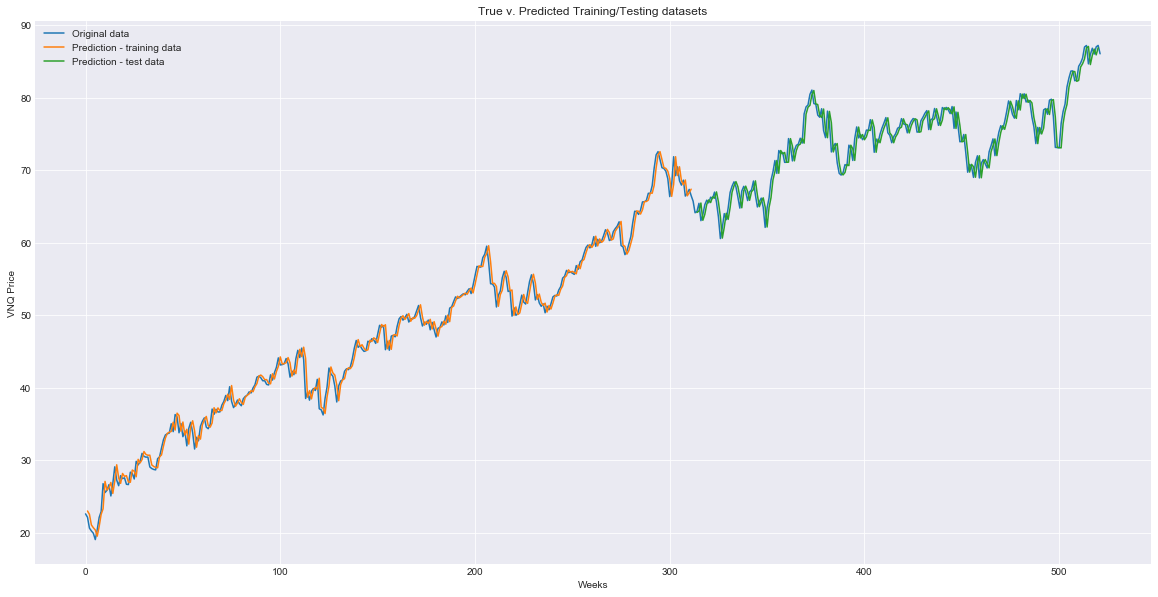

In [12]:
# Train predictions
train_pred_plot = np.empty_like(dataset)
train_pred_plot[:, :] = np.nan
train_pred_plot[window:len(train_pred) + window, :] = train_pred

# Test predictions
test_pred_plot = np.empty_like(dataset)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_pred) + (window * 2) + 1:len(dataset) - 1, :] = test_pred

#plot
plt.figure(figsize = (20, 10))
plt.plot(mm.inverse_transform(dataset), label = 'Original data')
plt.plot(train_pred_plot, label = 'Prediction - training data')
plt.plot(test_pred_plot, label = 'Prediction - test data')
plt.xlabel('Weeks')
plt.ylabel('VNQ Price')
plt.title('True v. Predicted Training/Testing datasets')
plt.legend()
plt.show()

In [13]:
LSTM_pred_VNQ = pd.DataFrame(test_pred)
%store LSTM_pred_VNQ

Stored 'LSTM_pred_VNQ' (DataFrame)
